['데이터분석가', 'SQL', '데이터시각화', '데이터분석', '모델링', '외', '등록일', '24/08/14']
['데이터분석가', 'Python', 'SQL', 'Spark', '게임', '등록일', '24/07/11']
['데이터분석가', 'Python', '빅데이터', '딥러닝', '데이터엔지니어', '외', '수정일', '24/07/26']
['데이터분석가', 'Python', '빅데이터', '딥러닝', '머신러닝', '외', '등록일', '24/07/01']
['데이터분석가', 'Python', '빅데이터', '딥러닝', '머신러닝', '외', '수정일', '24/08/09']
['데이터분석가', 'Python', '빅데이터', '머신러닝', '데이터엔지니어', '외', '수정일', '24/08/09']
['데이터분석가', '빅데이터', '데이터분석', '유지보수', '기획', '외', '등록일', '24/08/06']
['데이터분석가', 'Python', '빅데이터', '딥러닝', '머신러닝', '외', '등록일', '24/08/06']
['데이터분석가', '데이터엔지니어', '솔루션', 'DBA', 'MySQL', '외', '등록일', '24/08/13']
['데이터분석가', 'Python', '빅데이터', '머신러닝', '알고리즘', '외', '등록일', '24/08/07']
['데이터분석가', '빅데이터', '딥러닝', '머신러닝', 'SQL', '외', '등록일', '24/08/13']
['일반병원', '연구원', '생명과학', '세포실험', '생명공학', '외', '수정일', '24/08/01']
['데이터분석가', '빅데이터', '데이터라벨링', '데이터시각화', '마케팅기획', '외', '수정일', '24/07/12']
['데이터분석가', '머신러닝', '데이터엔지니어', '솔루션', 'SQL', '외', '등록일', '24/07/09']
['데이터분석가', 'Python', '빅데이터', '머신러닝', 'SQL', '외', '

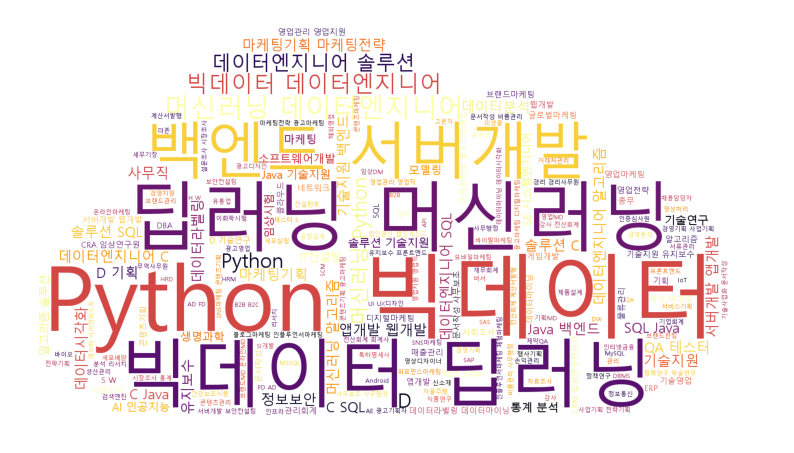

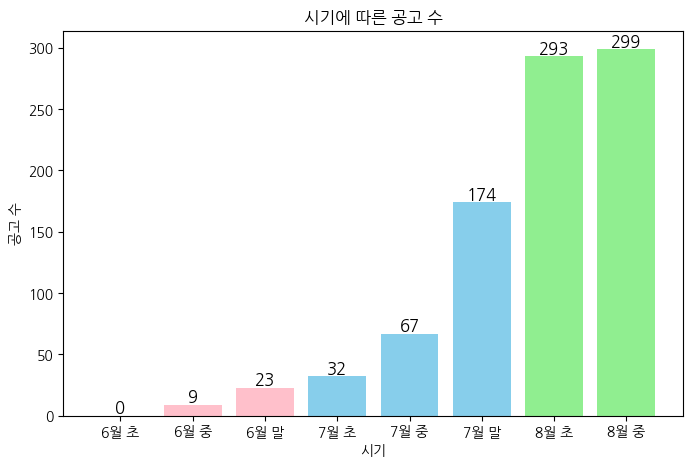

,month,season,count,month_s
0,3,중,1,3월 중
1,4,초,1,4월 초
2,4,말,1,4월 말
3,6,초,0,6월 초
4,6,중,9,6월 중
5,6,말,23,6월 말
6,7,초,32,7월 초
7,7,중,67,7월 중
8,7,말,174,7월 말
9,8,초,293,8월 초


In [34]:
from urllib.request import Request

from selenium import webdriver
from selenium.webdriver.common.by import By
from urllib.parse import quote
from urllib.request import urlopen
from bs4 import BeautifulSoup
import collections
from wordcloud import WordCloud
from konlpy.tag import Okt
import koreanize_matplotlib
from wordcloud import STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
import platform
import numpy as np
from PIL import Image
import pandas as pd

if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

da_list = []
da_date_list = []

def search_job(number):
    try:
        search_word = quote('데이터분석가')
        url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

        urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(urlrequest)

        soup = BeautifulSoup(html, 'html.parser')
        contents = soup.find('div', {'class':'content'})
        items = contents.select('div.item_recruit > div.area_job > div.job_sector')
        for item in items:
            item_string = item.text.replace('\n', '').replace(',','').strip().split()
            item_data = item_string[:-2]
            item_date = item_string[-1]
            da_date_list.append(item_date)
            print(item_string)
            for i in range(len(item_data)):

              da_list.append(item_data[i])

              stopwords_remove = ['빅데이터 데이터엔지니어','백엔드 서버개발','데이터분석가','외','연구원']
              for stopword in stopwords_remove:
                  if stopword in da_list:
                      da_list.remove(stopword)



    except Exception as e:
        print(e)

for i in range(1,10):
    search_job(i)

text = ' '.join(da_list)
# text_date = ' '.join(da_date_list)

if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin' :
    path = r'/System/Library/Fonts/AppleGothic'
else:
    font = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

img_mask = np.array(Image.open('cloud.png'))
wordcloud = WordCloud(font_path=path,width=400, height = 400, stopwords=STOPWORDS,
            background_color="white", max_font_size=200,
               repeat=True, colormap = 'inferno', mask = img_mask).generate(text)


print(wordcloud.words_)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


text_date_df = pd.DataFrame(da_date_list, columns=['date'])
text_date_df['date'] = pd.to_datetime(text_date_df['date'], format = '%y/%m/%d')
text_date_df['month'] = text_date_df['date'].dt.month
text_date_df['day'] = text_date_df['date'].dt.day

text_date_df['season'] = ''

for i in range(len(text_date_df)):
    if (text_date_df['day'][i] // 10 == 0):
        text_date_df.loc[i,'season'] = '초'
    elif (text_date_df['day'][i] // 10 == 1):
        text_date_df.loc[i,'season'] = '중'
    else:
        text_date_df.loc[i,'season'] = '말'

month_se_df = text_date_df[['month','season']]
month_se_df=month_se_df.groupby('month')

month_se_c_df = pd.DataFrame(month_se_df.value_counts())
month_se_c_df.reset_index(inplace = True)

month_se_c_df.loc[-1] = [6,'초',0]
month_se_c_df.sort_values(['month','season'], inplace = True, ascending=[True, False])
month_se_c_df.reset_index(inplace=True, drop=True)
month_se_c_df['month_s'] = month_se_c_df['month'].astype(str) + '월 ' + month_se_c_df['season']

plt.figure(figsize = (8,5))
bar=plt.bar(month_se_c_df['month_s'][3:],month_se_c_df['count'][3:], color = ['pink','pink','pink','skyblue','skyblue','skyblue','lightgreen','lightgreen'])
plt.title('시기에 따른 공고 수')
plt.xlabel('시기')
plt.ylabel('공고 수')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
plt.show()

month_se_c_df